# The Bias Variance Tradeoff

When fitting a model we need to balance our model's complexity with simplicity. We wish to find a model that describes the data well (such that it works with new data) but not to the point where it encapsulates too much noise. This is known as the **Bias-Variance Tradeoff**.

Let's start by importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

The data for this notebook takes the average body and brain weight for different species of mammals. Let's extract it and create a dataframe.

In [2]:
url = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt'
column_names = ['id', 'brain', 'body']
mammals = pd.read_table(url, sep = '\s+', skiprows = 33, names = column_names, index_col = 'id')
mammals.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


We'll only look at mammals with body weights less than 250.

In [3]:
mammals = mammals[mammals.body < 250]

Create a Seaborn scatter plot with a linear trend line.

(-10, 200)

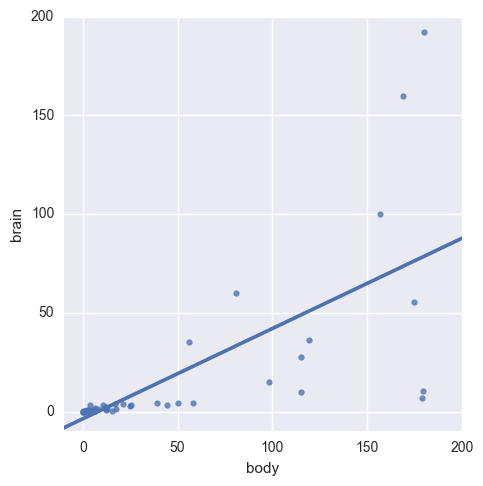

In [4]:
sns.lmplot(data = mammals, x = 'body', y = 'brain', ci = None)
plt.xlim(-10, 200)
plt.ylim(-10, 200)

Let's now pretend that we discover a new species of mammal. Its average body weight is 100, so we use the regression line to predict that its average brain weight is about 45. A linear model like this is straightforward enough to make a simple prediction.

However, in reality we don't actually have the full universe of data. We will often have various samples of the data. Let's use a random number generator to split the original data into two samples. The two underlying samples will both have potentially the same number of species but the individual observations will differ.

In [5]:
mammals['sample'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,1
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,2


We now plot the linear model again but for the two samples.

(-10, 200)

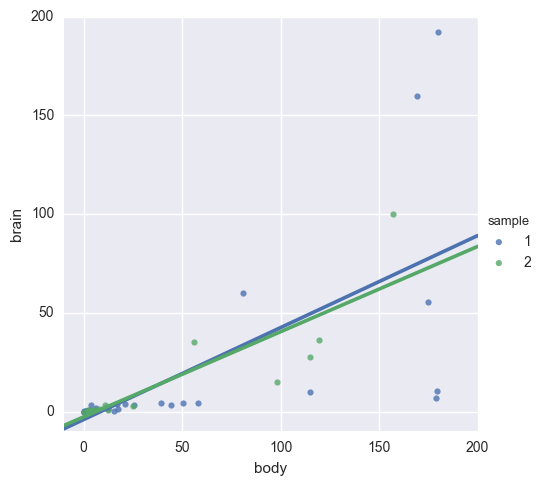

In [6]:
sns.lmplot(data = mammals, x = 'body', y = 'brain', hue = 'sample', ci = None)
plt.xlim(-10, 200)
plt.ylim(-10, 200)

We see that the two trend lines are similar to each other. This is an example of a **high bias, low variance** model. It is high bias because it doesn't fit the data particularly well, and it is low variance because it doesn't change much depending on the sample it is modelling. This is frequently referred to as **underfitting**.

So with that in mind, what does a **low bias, high variance** model look like? Well, instead of using a linear model to fit the data, let's use a high-order (say 6th order) polynomial. 

(-200, 200)

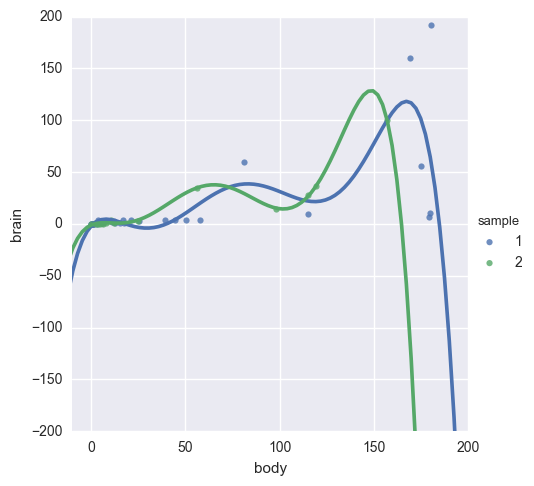

In [7]:
sns.lmplot(data = mammals, x = 'body', y = 'brain', hue = 'sample', order = 6, ci = None)
plt.xlim(-10, 200)
plt.ylim(-200, 200)

In this case the models are low bias, as they fit the data fairly well. However, they are high variance as they are both specific to the sample they are fitting and do not generalise the data well. This is often referred to as **overfitting**.

By now it should seem obvious that we are seeking a middle ground. We wish to find a model that has less bias than a linear model and less variance than a higher order polynomial.

Let's try a quadratic, or second order, polynomial.

(-10, 200)

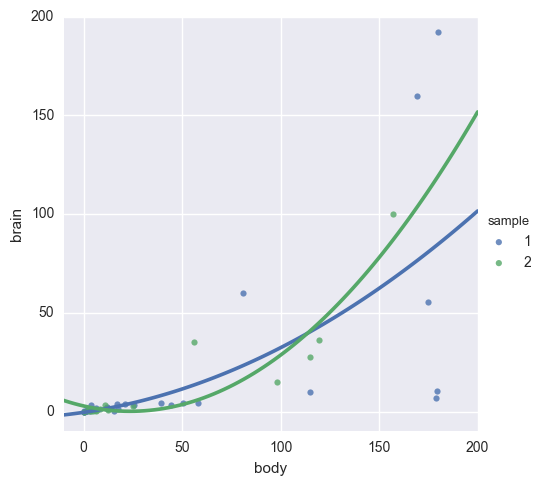

In [8]:
sns.lmplot(data = mammals, x = 'body', y = 'brain', hue = 'sample', order = 2, ci = None)
plt.xlim(-10, 200)
plt.ylim(-10, 200)

Ah, that's better. Both of the models fit the data well (such that we obtain the key information in the data) but not to the point that the models contain too much noise.

This is the essence of the Bias-Variance Tradeoff. We seek a model that strikes a suitable balance between bias and variance, so that it generalises to new, or out-of-sample, data well.